<a href="https://colab.research.google.com/github/arockingvirus/test/blob/master/Lab10_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 6 color = Orange> Network Coverage

In [ ]:
!pip install ndlib

In [ ]:
## import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import statistics as st
import operator

In [ ]:
## read the dataset "change the path accordingly"

## football dataset
G_football = pd.read_csv('/content/football (2).csv')

## karate dataset
G_karate = pd.read_csv('/content/karate.csv')

## dolphin dataset
#G_dolphin = pd.read_csv('/Users/sahajsingh/Documents/dolphins.csv')

## lesmis dataset
G_lesmis = pd.read_csv('/content/lesmis.csv')

In [ ]:
## select the dataset of your choice from above
G = G_karate

In [ ]:
## function to create graph form edgeset

def createGraph(G):
    g = nx.Graph()
    for i in G.index:
        g.add_edge(G.iloc[i,0],G.iloc[i,1])
    return g

In [ ]:
## using SI epidemic model 
## given source node and no. of iteration

def SIModel(g,sourceNode,iteration):
    # Model selection
    model = ep.SIModel(g)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta',0.05)

    cfg.add_model_initial_configuration("Infected", sourceNode)

    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(iteration)
    
    return iterations

In [ ]:
## function for updating infected Nodes at each iteration

def update_inf(inf,g,state):
    for i in g.nodes:
        if state[i] == 1:
            inf.append(i)
    return inf

In [ ]:
## function for updating state at each iteration
def update_state(iteration, g, state):
    for i in iteration['status']:
        state[i] = 1
    return state

In [ ]:
## neighbour coverage at each iteration
def neighbourcoverage(iterations,g,nn,state,node,it):
    sum = 0.
    T = 0
    for i in node:
        T += 1
        I = 0.
        N = 0.
        for j in nn:
            N += 1
            if state[j] == 1 : 
                I += 1
        
        sum += I/N
    
    val = 0.
    
    if sum!=0:
        val = sum/T
    
    return val

In [ ]:
## whole graph coverage by iterating till neigbour coverage is unity

def wholeGraphCoverage(g,iterations,itt):
    ## 
    st = []
    for i in iterations:
        s = i['status']
        st.append(s)
    
    ## Neighbour Coverage
    NC = {}

    ## total inf
    T = {}
    ## total neighbours at jth
    N = {}
    ## iterator
    it = []
    
    ## total inf at each iteration
    
    for i in range(0,itt):
        T[i]=iterations[i]['node_count'][1]
        
    ## total neighbour of each node
    N = g.degree()
    
    ## iterator
    for i in iterations:
        it.append(i['iteration'])
        
    ## status of each node at a given iteration
    state = {}
    state.clear()
    state
    
    ## neigbours of nodes
    nn = {}
    for i in g.nodes():
        n = []
        for j in g.neighbors(i):
            n.append(j)
        nn[i]=n
        
    ## initial state and total infected
    state = st[0]
    inf = []
    state[1]=0
    
    iterval = 0
    NC = {}
    flag = 0
    for i in it:
        if i == 0:
            continue
        NC[i] = neighbourcoverage(iterations,g,nn,state,inf,i)
        inf = update_inf(inf, g, state)
        state = update_state(iterations[i],g,state)
        
        if NC[i]==1 and flag==0:
            flag=1
            iterval = i
        
            
    return NC,iterval

In [ ]:
## different centrality measures for source node selection

def centralities(g):
    CB = nx.betweenness_centrality(g)
    CD = nx.degree_centrality(g)
    CC = nx.closeness_centrality(g)
    
    return CB,CD,CC
    

In [ ]:
## getting source node by their centrality measure

def CPara(g,pt):
    
    s = []
    a = centralities(g)
    cv = []
   
    for i in a:
        list_value, y = [],[]
        list_value.clear()
        for key,value in i.items():
            y.append(value)
            
        given_value = np.percentile(y,pt)

        for j in i.values():
            list_value.append(j)


        absolute_difference_function = lambda list_value : abs(list_value - given_value)

        closest_value = min(list_value, key=absolute_difference_function)
        
        cv.append(closest_value)
        t = None
        for name, age in i.items():
            if age == closest_value:
                t = name
                break
        s.append(t)
    return s,cv

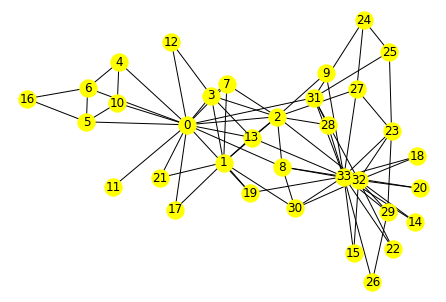

In [ ]:
## initiate graph

g = createGraph(G)

##g = nx.erdos_renyi_graph(300,0.1)
##g = nx.barabasi_albert_graph(100,3)

nx.draw(g,with_labels=True,node_color='yellow')

In [ ]:
## getting min , min-med, median, max-med, max from centralities
## and selecting the source node 

pt = [0,25,50,75,100]

snodes = []
cv = []
for i in pt:
    a,b = (CPara(g,i))
    snodes.append(a)
    cv.append(b)
snodes

[[11, 11, 16], [11, 12, 12], [29, 4, 5], [19, 8, 3], [0, 33, 0]]

In [ ]:
a,b,c = [],[],[]
for i in snodes:
    a.append(i[0])
    b.append(i[1])
    c.append(i[2])
print(a)
print(b)
print(c)

[11, 11, 29, 19, 0]
[11, 12, 4, 8, 33]
[16, 12, 5, 3, 0]


In [ ]:
## main function

def callfun(G,a):
    

    NCS = []
    it = []
    itt =50
    sNode = a
    for i in sNode:
        ## SI model
        iterations = SIModel(g,sourceNode=[i],iteration=itt)

        ## Neighbour Coverage
        NC,itval = wholeGraphCoverage(g,iterations,itt=itt)

        NCS.append(NC)
        it.append(itval)
    return it,NCS

In [ ]:
B_it,B_NCS = callfun(G,a)
D_it,D_NCS = callfun(G,b)
C_it,C_NCS = callfun(G,c)

100%|██████████| 50/50 [00:00<00:00, 5958.16it/s]


In [ ]:
it = []
it.append(B_it)
it.append(D_it)
it.append(C_it)
CC = []
CC.append(B_NCS)
CC.append(D_NCS)
CC.append(C_NCS)

In [ ]:
def plotchart(NCS):
    
    ax = ["ax1","ax2","ax3"]
    d = ["minimum","Min_med","Median","Max_med","Maximum"]
    title = ["Betweenes Centrality","Degree Centrality", "Closeness Centrality"]
    fig, (ax) = plt.subplots(nrows=len(ax), ncols=1, figsize=(10, 30))

    for m in range(0,len(ax)):
        
        x,y = [],[]
        for i in NCS[m]:
            p ,q = [],[]
            for j in i:
                p.append(j)
                q.append(i[j])
            x.append(p)
            y.append(q)
        for i in range(0,5):
            ax[m].plot(x[i],y[i],label=d[i])
        yt=np.transpose(y)
        yy = []
        for i in yt:
            if(i[0]==1. and i[1]==1. and i[2]==1. and i[3]==1. and i[4]==1.):
                break
            yy.append(i)

        ax[m].boxplot(yy,vert=True,patch_artist=True)
        ax[m].legend()
        ax[m].set_title(title[m])
        ax[m].set_xlabel('Iterations')
        ax[m].set_ylabel('Neighbour Coverage')        
        
    plt.show()
    

In [ ]:
def plotbar(it):
    color = ["red","violet","orange"]
    ax = ["ax1","ax2","ax3"]
    d = ["minimum","Min_med","Median","Max_med","Maximum"]
    title = ["Betweenes Centrality","Degree Centrality", "Closeness Centrality"]
    fig, (ax) = plt.subplots(nrows=1, ncols=len(ax), figsize=(20, 7))
    
    for i in range(0,len(ax)):
        ax[i].set_title(title[i])
        ax[i].bar(d,it[i],color=color[i])
        #ax[i].boxplot(it[i],vert=True,patch_artist=True)

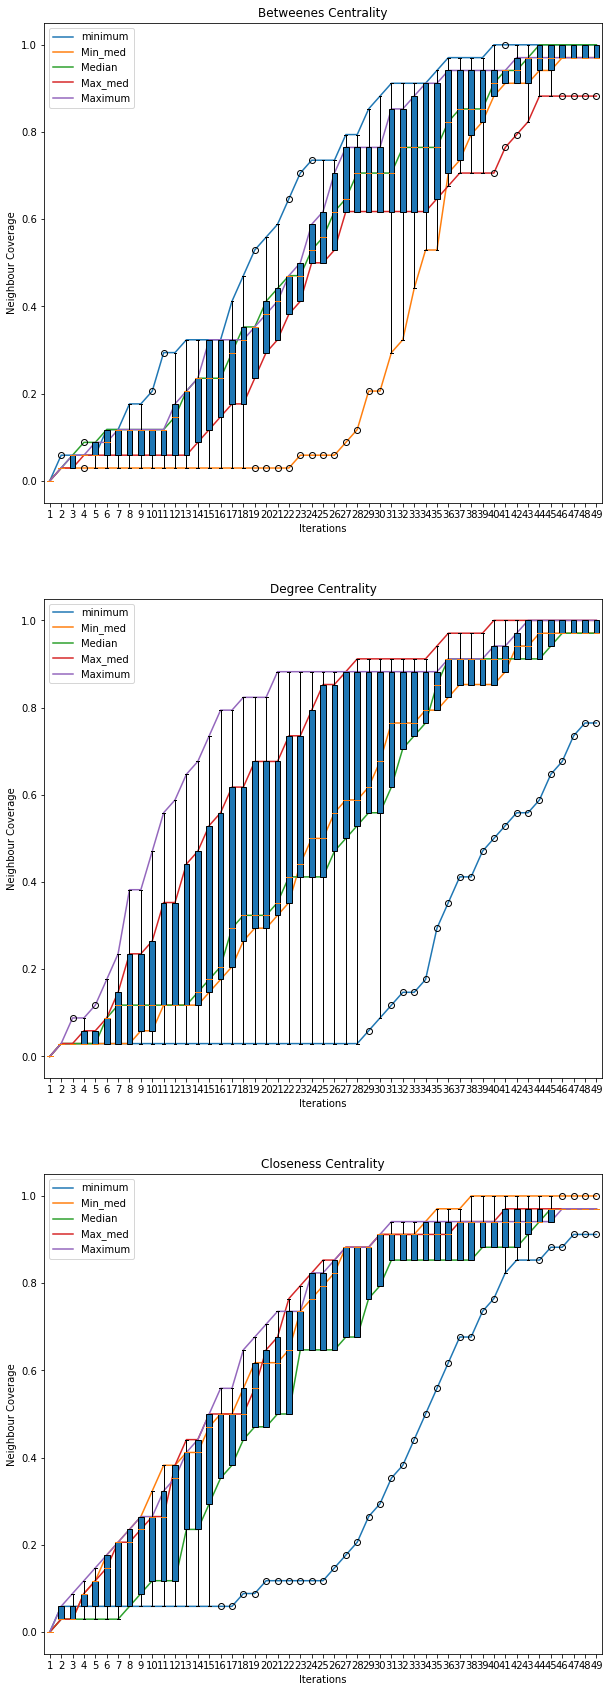

In [ ]:
#plt.subplot(1,3,1)
plotchart(CC)

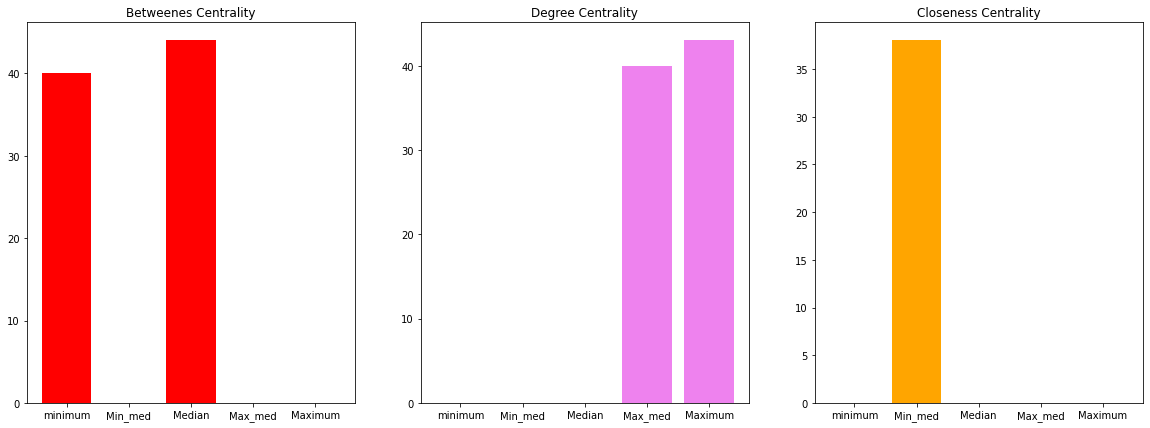

In [ ]:
plotbar(it)